## Numpy and Pandas working together

- Pandas depends upon and interoperates with $NumPy$.
- DataFrame attribute **.values** to represent a DataFrame df as a NumPy array.
- You can also pass pandas data structures to NumPy methods

In [2]:
import pandas as pd

### DataFrames from dict(1)

In [3]:
data = {'weekday':['Sun', 'Sun', 'Mon', 'Mon'],
        'city':['Austin', 'Dallas', 'Austin', 'Dallas'],
        'visitors':[139, 237, 396, 258],
        'singups':[7, 12, 3, 5]}
users = pd.DataFrame(data)
print(users)
print()
print(users.info())

     city  singups  visitors weekday
0  Austin        7       139     Sun
1  Dallas       12       237     Sun
2  Austin        3       396     Mon
3  Dallas        5       258     Mon

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
city        4 non-null object
singups     4 non-null int64
visitors    4 non-null int64
weekday     4 non-null object
dtypes: int64(2), object(2)
memory usage: 208.0+ bytes
None


### DataFrames from dict(2)

In [4]:
cities = ['Austin', 'Dallas', 'Austin', 'Dallas']
singups = [7, 12, 3, 5]
visitors = [139, 237, 396, 258]
weekday = ['Sun', 'Sun', 'Mon', 'Mon']

list_labels = ['cities', 'singups', 'visitors', 'weekday']
list_cols = [cities, singups, visitors, weekday]

zipped = list(zip(list_labels, list_cols))
print(zipped)
print()
data = dict(zipped)
print(data)
print()
users = pd.DataFrame(data)
print(users)

[('cities', ['Austin', 'Dallas', 'Austin', 'Dallas']), ('singups', [7, 12, 3, 5]), ('visitors', [139, 237, 396, 258]), ('weekday', ['Sun', 'Sun', 'Mon', 'Mon'])]

{'cities': ['Austin', 'Dallas', 'Austin', 'Dallas'], 'singups': [7, 12, 3, 5], 'visitors': [139, 237, 396, 258], 'weekday': ['Sun', 'Sun', 'Mon', 'Mon']}

   cities  singups  visitors weekday
0  Austin        7       139     Sun
1  Dallas       12       237     Sun
2  Austin        3       396     Mon
3  Dallas        5       258     Mon


### Broadcasting

- Broadcasting saves time in generating long lists, arrays, or columns.

In [5]:
users['fee'] = 0
print(users)

   cities  singups  visitors weekday  fee
0  Austin        7       139     Sun    0
1  Dallas       12       237     Sun    0
2  Austin        3       396     Mon    0
3  Dallas        5       258     Mon    0


### Broadcasting with a dict

In [6]:
import pandas as pd

heights = [100.1, 51.8, 22.7, 33.8, 60.4]
data = {'height': heights, 'sex':'M'}
results = pd.DataFrame(data)

print(results)
        

   height sex
0   100.1   M
1    51.8   M
2    22.7   M
3    33.8   M
4    60.4   M


### Index and columns

In [7]:
results.columns = ['height(in)', 'sex']
results.index = ['A', 'B', 'C', 'D', 'E']

print(results)

   height(in) sex
A       100.1   M
B        51.8   M
C        22.7   M
D        33.8   M
E        60.4   M


### Importing and exporting data

In [8]:
import pandas as pd

filePath = 'data\\source\\SN_d_tot_V2.0.csv'

sunspots = pd.read_csv(filePath, sep=';')
sunspots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73199 entries, 0 to 73198
Data columns (total 8 columns):
1818        73199 non-null int64
01          73199 non-null int64
01.1        73199 non-null int64
1818.001    73199 non-null float64
  -1        73199 non-null int64
 -1.0       73199 non-null float64
   0        73199 non-null int64
1           73199 non-null int64
dtypes: float64(2), int64(6)
memory usage: 4.5 MB


### Problems
- No column headers
- Missing values in column 4 :indicated by -1
- Dates representation inconvenient

In [9]:
sunspots.iloc[10:20, :]   # the column headers don't make sense 

,1818,01,01.1,1818.001,-1,-1.0,0,1
10,1818,1,12,1818.032,-1,-1.0,0,1
11,1818,1,13,1818.034,37,7.7,1,1
12,1818,1,14,1818.037,-1,-1.0,0,1
13,1818,1,15,1818.040,-1,-1.0,0,1
14,1818,1,16,1818.042,-1,-1.0,0,1
15,1818,1,17,1818.045,77,11.1,1,1
16,1818,1,18,1818.048,98,12.6,1,1
17,1818,1,19,1818.051,105,13.0,1,1
18,1818,1,20,1818.053,-1,-1.0,0,1
19,1818,1,21,1818.056,-1,-1.0,0,1


In [10]:
sunspots = pd.read_csv(filePath, sep=';', header=None)
sunspots.iloc[10:20, :]

,0,1,2,3,4,5,6,7
10,1818,1,11,1818.029,-1,-1.0,0,1
11,1818,1,12,1818.032,-1,-1.0,0,1
12,1818,1,13,1818.034,37,7.7,1,1
13,1818,1,14,1818.037,-1,-1.0,0,1
14,1818,1,15,1818.040,-1,-1.0,0,1
15,1818,1,16,1818.042,-1,-1.0,0,1
16,1818,1,17,1818.045,77,11.1,1,1
17,1818,1,18,1818.048,98,12.6,1,1
18,1818,1,19,1818.051,105,13.0,1,1
19,1818,1,20,1818.053,-1,-1.0,0,1


In [11]:
col_names = ['year', 'month', 'day', 'dec_date', 'sunspots', 'std', 'observations', 'definite']
sunspots = pd.read_csv(filePath, sep=';', header=None, names=col_names)
sunspots.iloc[10:20, :]

,year,month,day,dec_date,sunspots,std,observations,definite
10,1818,1,11,1818.029,-1,-1.0,0,1
11,1818,1,12,1818.032,-1,-1.0,0,1
12,1818,1,13,1818.034,37,7.7,1,1
13,1818,1,14,1818.037,-1,-1.0,0,1
14,1818,1,15,1818.040,-1,-1.0,0,1
15,1818,1,16,1818.042,-1,-1.0,0,1
16,1818,1,17,1818.045,77,11.1,1,1
17,1818,1,18,1818.048,98,12.6,1,1
18,1818,1,19,1818.051,105,13.0,1,1
19,1818,1,20,1818.053,-1,-1.0,0,1


In [12]:
sunspots = pd.read_csv(filePath, sep=';', header=None, names=col_names, na_values='-1')
sunspots.iloc[10:20, :]  # but the sunspots column still has entries of negative one

,year,month,day,dec_date,sunspots,std,observations,definite
10,1818,1,11,1818.029,-1,NaN,0,1
11,1818,1,12,1818.032,-1,NaN,0,1
12,1818,1,13,1818.034,37,7.7,1,1
13,1818,1,14,1818.037,-1,NaN,0,1
14,1818,1,15,1818.040,-1,NaN,0,1
15,1818,1,16,1818.042,-1,NaN,0,1
16,1818,1,17,1818.045,77,11.1,1,1
17,1818,1,18,1818.048,98,12.6,1,1
18,1818,1,19,1818.051,105,13.0,1,1
19,1818,1,20,1818.053,-1,NaN,0,1


In [13]:
#there are space characters preceding minus ones throughout column 4
sunspots = pd.read_csv(filePath, sep=';', header=None, names=col_names, na_values={'sunspots':['  -1'], 'std':['-1']})

#Notice the sunspots numbers are now floating-point values (not integers).
sunspots.iloc[10:20, :]  

,year,month,day,dec_date,sunspots,std,observations,definite
10,1818,1,11,1818.029,NaN,NaN,0,1
11,1818,1,12,1818.032,NaN,NaN,0,1
12,1818,1,13,1818.034,37.0,7.7,1,1
13,1818,1,14,1818.037,NaN,NaN,0,1
14,1818,1,15,1818.040,NaN,NaN,0,1
15,1818,1,16,1818.042,NaN,NaN,0,1
16,1818,1,17,1818.045,77.0,11.1,1,1
17,1818,1,18,1818.048,98.0,12.6,1,1
18,1818,1,19,1818.051,105.0,13.0,1,1
19,1818,1,20,1818.053,NaN,NaN,0,1


### Using parse_dates keyword

In [14]:
sunspots = pd.read_csv(filePath, sep=';', header=None, names=col_names, na_values={'sunspots':['  -1'], 'std':['-1']},
                       parse_dates=[[0, 1, 2]])
print(sunspots.iloc[10:20, :])

print()
print(sunspots.info())

   year_month_day  dec_date  sunspots   std  observations  definite
10     1818-01-11  1818.029       NaN   NaN             0         1
11     1818-01-12  1818.032       NaN   NaN             0         1
12     1818-01-13  1818.034      37.0   7.7             1         1
13     1818-01-14  1818.037       NaN   NaN             0         1
14     1818-01-15  1818.040       NaN   NaN             0         1
15     1818-01-16  1818.042       NaN   NaN             0         1
16     1818-01-17  1818.045      77.0  11.1             1         1
17     1818-01-18  1818.048      98.0  12.6             1         1
18     1818-01-19  1818.051     105.0  13.0             1         1
19     1818-01-20  1818.053       NaN   NaN             0         1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73200 entries, 0 to 73199
Data columns (total 6 columns):
year_month_day    73200 non-null datetime64[ns]
dec_date          73200 non-null float64
sunspots          69953 non-null float64
std          

### Using dates as index

In [15]:
sunspots.index = sunspots['year_month_day']
sunspots.index.name = 'date'

print(sunspots.info())
print()
print(sunspots.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73200 entries, 1818-01-01 to 2018-05-31
Data columns (total 6 columns):
year_month_day    73200 non-null datetime64[ns]
dec_date          73200 non-null float64
sunspots          69953 non-null float64
std               69953 non-null float64
observations      73200 non-null int64
definite          73200 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 3.9 MB
None

           year_month_day  dec_date  sunspots  std  observations  definite
date                                                                      
1818-01-01     1818-01-01  1818.001       NaN  NaN             0         1
1818-01-02     1818-01-02  1818.004       NaN  NaN             0         1
1818-01-03     1818-01-03  1818.007       NaN  NaN             0         1
1818-01-04     1818-01-04  1818.010       NaN  NaN             0         1
1818-01-05     1818-01-05  1818.012       NaN  NaN             0         1


### Trimming redundant columns

In [16]:
cols = ['sunspots', 'std', 'observations', 'definite']
sunspots = sunspots[cols]

sunspots.iloc[10:20, :]

,sunspots,std,observations,definite
date,,,,
1818-01-11,NaN,NaN,0,1
1818-01-12,NaN,NaN,0,1
1818-01-13,37.0,7.7,1,1
1818-01-14,NaN,NaN,0,1
1818-01-15,NaN,NaN,0,1
1818-01-16,NaN,NaN,0,1
1818-01-17,77.0,11.1,1,1
1818-01-18,98.0,12.6,1,1
1818-01-19,105.0,13.0,1,1


### Writing files

In [19]:
out_csv = 'data\\output\\sunspots.csv'
sunspots.to_csv(out_csv)

out_tsv = 'data\\output\\sunspots.tsv'
sunspots.to_csv(out_tsv, sep='\t')

out_xlsx = 'data\\output\\sunspots.xlsx'
writer = pd.ExcelWriter(out_xlsx, engine='xlsxwriter')
sunspots.to_excel(writer)
writer.save()

## Plotting with pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

filePath = 'data\\source\\aapl.csv'

aapl = pd.read_csv(filePath, index_col='Date', parse_dates=True)

print(aapl.info())
print()
print(aapl.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6081 entries, 2008-10-14 to 1984-09-07
Data columns (total 6 columns):
Open         6081 non-null float64
High         6081 non-null float64
Low          6081 non-null float64
Close        6081 non-null float64
Volume       6081 non-null int64
Adj Close    6081 non-null float64
dtypes: float64(5), int64(1)
memory usage: 332.6 KB
None

              Open    High     Low   Close    Volume  Adj Close
Date                                                           
2008-10-14  116.26  116.40  103.14  104.08  70749800     104.08
2008-10-13  104.55  110.53  101.02  110.26  54967000     110.26
2008-10-10   85.70  100.00   85.00   96.80  79260700      96.80
2008-10-09   93.35   95.80   86.60   88.74  57763700      88.74
2008-10-08   85.91   96.33   85.68   89.79  78847900      89.79


### Plotting arrays (matplotlib)

<class 'numpy.ndarray'>


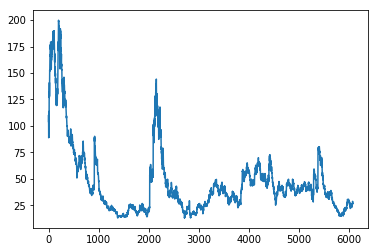

In [3]:
close_arr = aapl['Close'].values
print(type(close_arr))

plt.plot(close_arr)
plt.show()             # horizontal axis of the plot corresponds to date indices of the array

### Plotting Series (matplotlib)

Date
2008-10-14    104.08
2008-10-13    110.26
2008-10-10     96.80
2008-10-09     88.74
2008-10-08     89.79
Name: Close, dtype: float64
<class 'pandas.core.series.Series'>


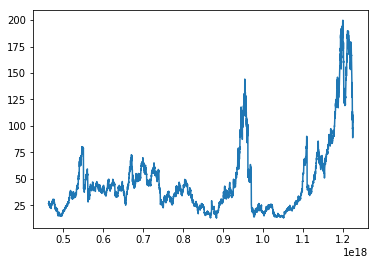

In [4]:
close_series = aapl['Close']
print(type(close_series))

plt.plot(close_series)
plt.show()

### Plotting Series (pandas)

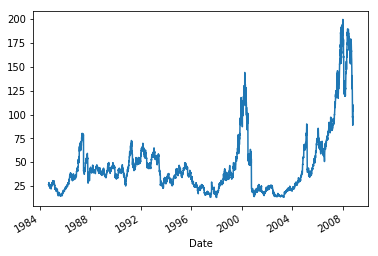

In [41]:
close_series.plot()
plt.show()

### Plotting DataFrames (pandas)

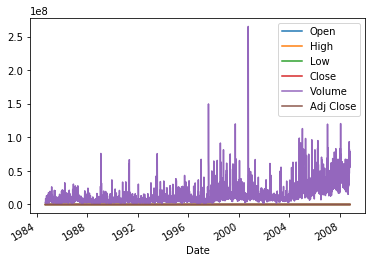

In [42]:
aapl.plot()
plt.show()

### Plotting DataFrames (matplotlib)

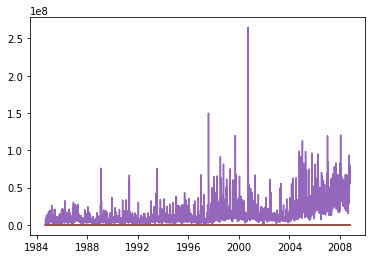

In [45]:
plt.plot(aapl)
plt.show()      # no legend and no title on the date axis

### Fixing scales

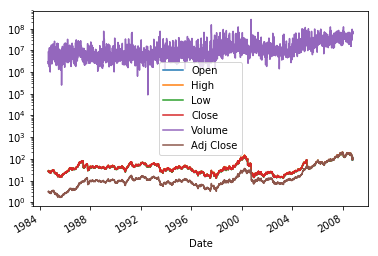

In [46]:
aapl.plot()
plt.yscale('log')
plt.show()

### Customizing plots

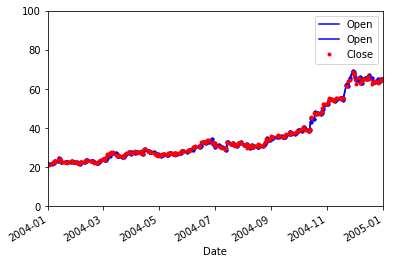

In [48]:
aapl['Open'].plot(color='b', style='.-', legend=True)
aapl['Close'].plot(color='r', style='.', legend=True)

plt.axis(('2004', '2005', 0, 100))
plt.show()

### Saving plots

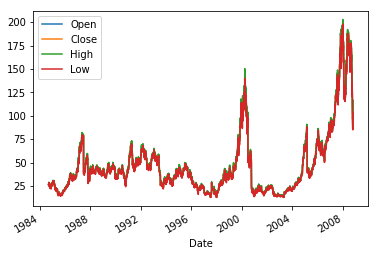

In [60]:
df = aapl.loc[:, ['Open', 'Close', 'High', 'Low']]
df.plot()

plt.savefig('data\\output\\aapl.png')
plt.savefig('data\\output\\aapl.jpg')
plt.savefig('data\\output\\aapl.pdf')

plt.show()